## Random networks

This notebook contains additional material about random graphs. The aim is to introduce a few simple random realisations of graphs that can serve as null model against measures of the network observed in the data can be compared.

We will use previously introduced libraryies: *igraph* (to generate and analyze networks) and *ggplot2* (to visualize results).

In [2]:
library(igraph)
library(ggplot2)

In [3]:
#### 1.2 Set the seed to be used in random processes

seed <- 612

To ilustrate usefulness of random networks, we will focus on a single previously analized network - friendship network. We first load it and remind ourselves of its size using ```summary```:

In [4]:
data_dir = "output/lab1/"

In [5]:
krack_friendship <- readRDS(paste0(data_dir, "krack_friendship.RData"))
summary(krack_friendship)

IGRAPH 6f85218 DN-- 21 102 -- 
+ attr: AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n), name (v/n)


Discussed ideas can be applied to directed networks as well, but it is more ilustrative and clear if we work with undirected networks first, so let's create an undirected friendship network:

In [6]:
krack_friendship_undirect <- as.undirected(krack_friendship, 
                                           mode = "collapse") #try also with mode = 'mutual' that will create even less links
summary(krack_friendship_undirect)

IGRAPH 37db12f UN-- 21 79 -- 
+ attr: AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n), name (v/n)


As noted in our previous analysis, this reduce the number of links (as links from A to B and from B to A will be collapsed into a single undirected link between A and B).

We will plot networks few times below, so let's make a simple plotting function for those purposes: 

In [7]:
plot_graph <- function(g, title) {
  plot(g, 
       layout=layout_nicely(g),
       vertex.size = 1.5 * degree(g),
       vertex.label.cex	= 0.15 * degree(g),
       main=title)
}

Let's try the function and plot the undirected friendship network:

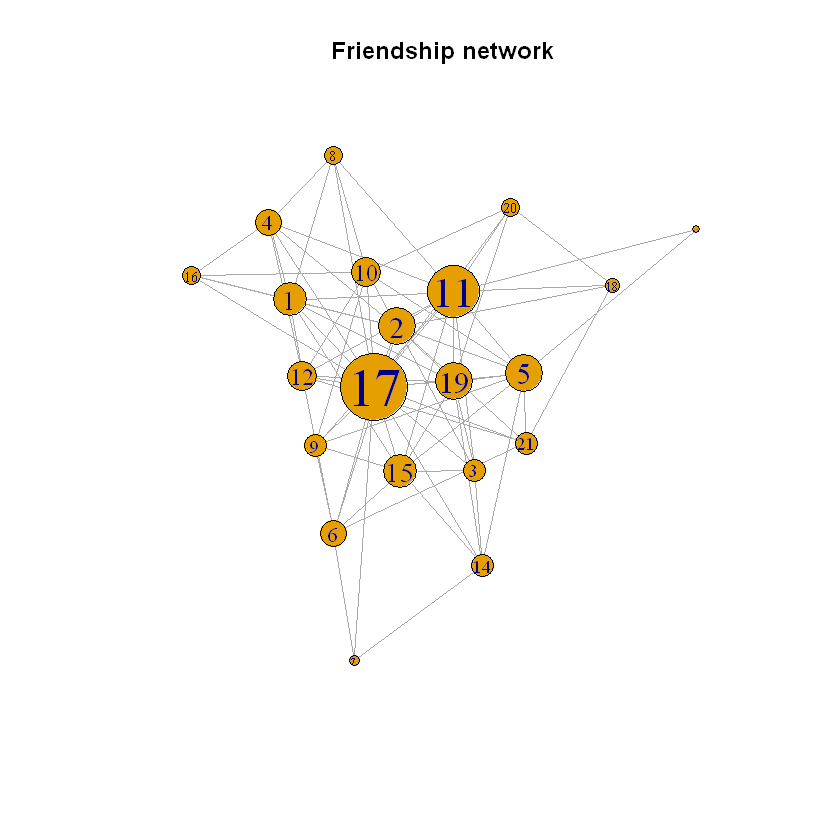

In [8]:
plot_graph(krack_friendship_undirect,'Friendship network')

### Random graphs with preserved average degree

No surprises here, we've seen this network previously. Now, we want to see how this network compares to a randomly generated network. 
*igraph* has a few network generative functions and among them Erdos Renyi random graphs that we will use first. 
As usual, you can first inspect documentation of the function:

In [ ]:
?erdos.renyi.game

Besides the number of nodes, the key arguments are either the exact number of links we expect (in which case besides the number of links, we should pass the argument *type = 'gnm'* to the function) or the probability that the link is created between two randomly samples nodes (in which case besides probability, we pass arg *type = 'gnp'*). Let's try first 'gnm' type of random network:

In [14]:
random_net_gnm = erdos.renyi.game(vcount(krack_friendship_undirect), ecount(krack_friendship_undirect),type='gnm')
summary(random_net_gnm)

IGRAPH 544b470 U--- 21 79 -- Erdos renyi (gnm) graph
+ attr: name (g/c), type (g/c), loops (g/l), m (g/n)


As we wanted, it has the same number of nodes and edges as the friendship network (that we enforced by passing vcount and ecount values as arguments of the ```erdos.renyi.game``` function. Let's plot it to see if we can observe some differences:

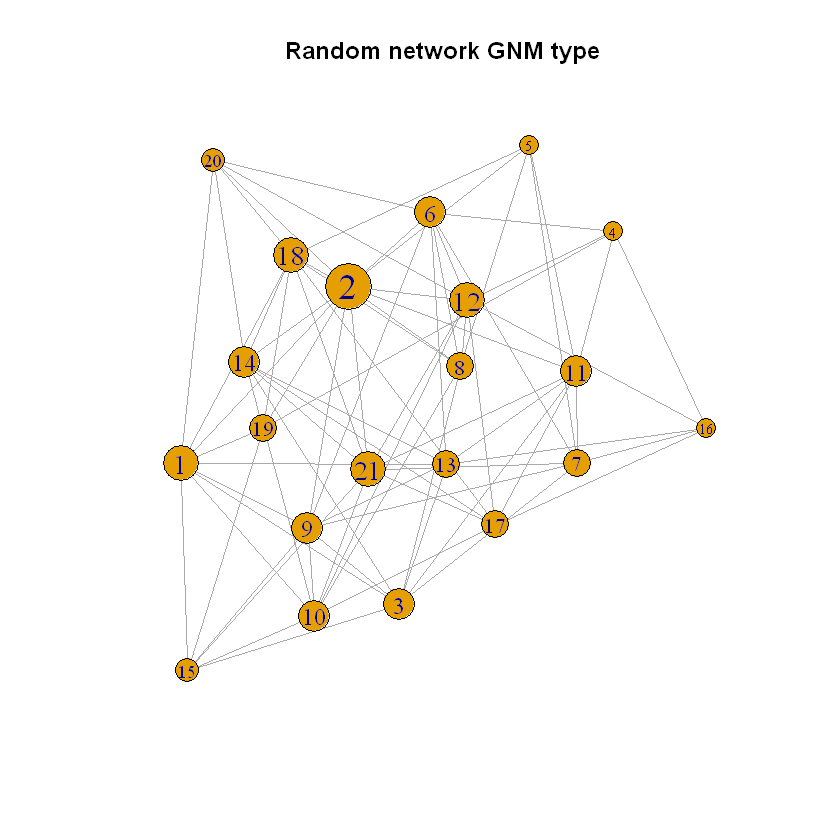

In [15]:
plot_graph(random_net_gnm,'Random network GNM type')

Already visually we can note that the node with the most neighbours changed, and its number of neighbours is different than max degree before (compare largest node cyrcles above and here).

We can repead the process and create a few more realisation of this network:

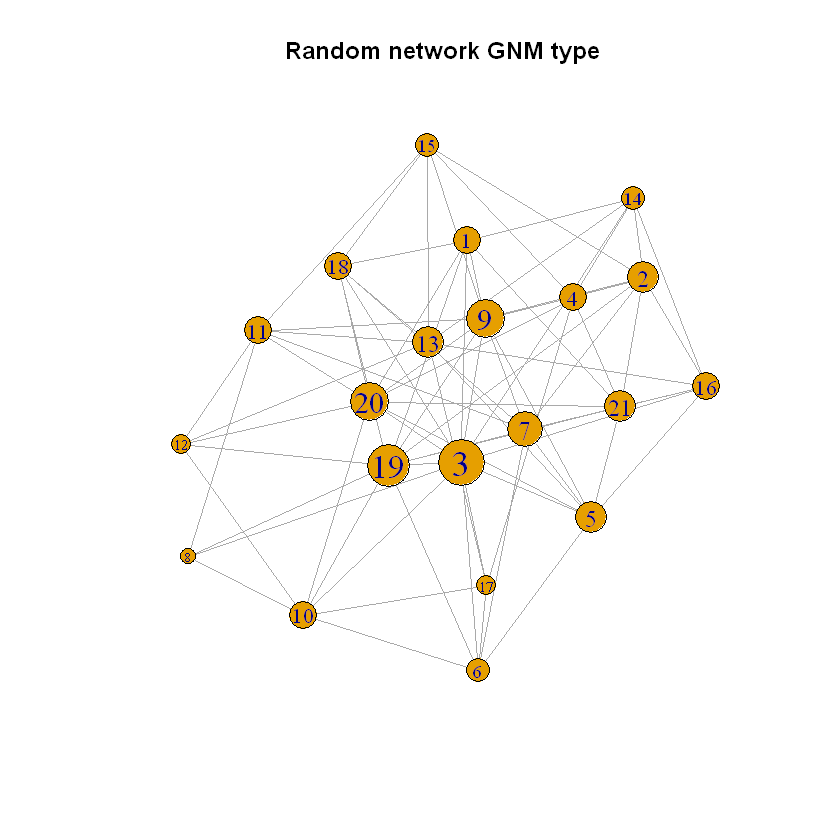

In [16]:
set.seed(seed)
random_net_gnm = erdos.renyi.game(vcount(krack_friendship_undirect), ecount(krack_friendship_undirect),type='gnm')
plot_graph(random_net_gnm,'Random network GNM type')

Note: even after a few reruns, we see that a node that has only 2 friends (that exist in our original network) occurs rarely in the random realisations.

The average degree is exactly the same between *krack_friendship_undirect* and *random_net_gnm* networks (by construction), but other summary statistics such as median, standard deviation, etc, are not (check this out for yourselves):

In [17]:
mean(degree(krack_friendship_undirect))
#sd(degree(krack_friendship_undirect))

[1] 7.52381

In [18]:
mean(degree(random_net_gnm))
#sd(degree(random_net_gnm))

[1] 7.52381

Another possible random network realisation assumes that we relax requirement on the number of links. Instead of requiring a network with exactly N nodes and L links, we create a random network whose expected value of links is L, but in any single random network realisation it can be slightly above or below L. We can do this using the 'gnp' option of ```erdos.renyi.game``` and using parameter p, or probability that there is a link between two nodes whose value is the density of the original graph:

In [19]:
n = vcount(krack_friendship_undirect)
l = ecount(krack_friendship_undirect)
p = l/(0.5*n*(n-1)) 

Let's create this new random network and visualize it:

IGRAPH 5e644ba U--- 21 75 -- Erdos renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)


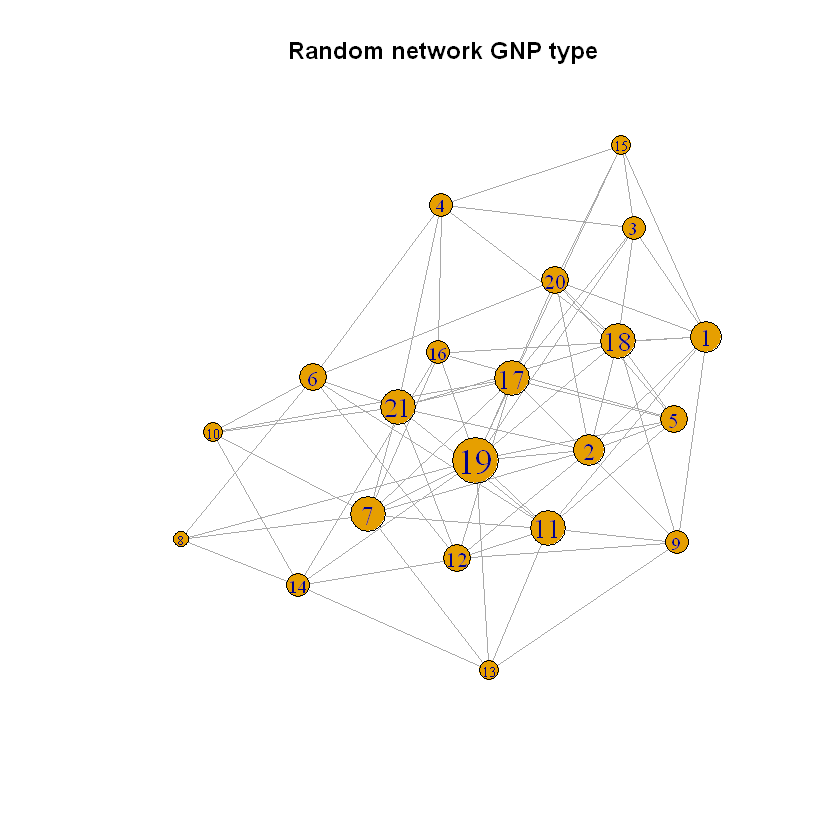

In [20]:
set.seed(seed)
random_net_gnp = erdos.renyi.game(n, p, type='gnp')
summary(random_net_gnp)
plot_graph(random_net_gnp,'Random network GNP type')

Running previous block of code several times (comment seed command), you can note variability in the number of links and visually note graph differences. Now, as number of links is often smaller than in the original graph, there are situations where some nodes have only two connections (the situation we've observed in the original network), but still nodes with most connections have less connections than the most popular node in the original network.

Let's have a look at the degree distributions. We first create a dataframe containing the data, and then we plot the distributions using histograms as before.

In [21]:
network_data <- data.frame(
  network_type = c( rep("friendship", n), rep("random_gnm", n), rep("random_gnp", n) ),
  degree_values = c( degree(krack_friendship_undirect), degree(random_net_gnm), degree(random_net_gnp) )
)
head(network_data)

,network_type,degree_values
,<chr>,<dbl>
1,friendship,9
2,friendship,10
3,friendship,6
4,friendship,7
5,friendship,10
6,friendship,7


Similarly to the codes in previous labs, we now proceed to plot a histogram where we display degree distributions for all networks.

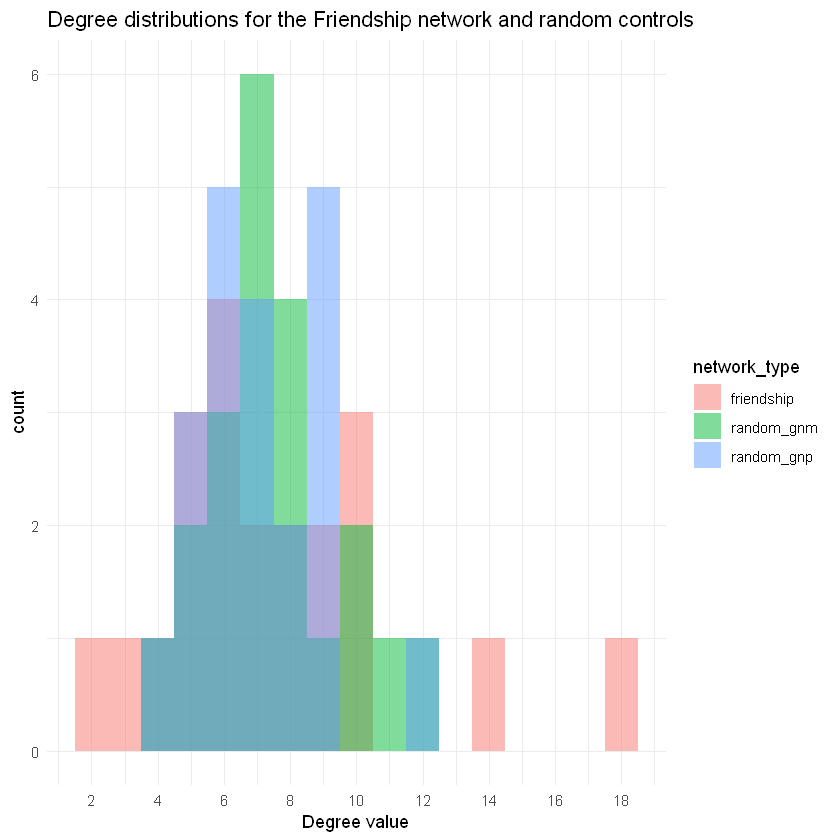

In [22]:
max_degree <- max(network_data$degree_values)
min_degree <- min(network_data$degree_values)

ggplot(network_data, 
       mapping = aes(x = degree_values, fill = network_type)) +
  geom_histogram(binwidth = 1, 
                 position = position_identity(),
                 #position = position_dodge(),
                 alpha=0.5) +
  scale_x_continuous(breaks = seq(min_degree,max_degree,2)) +
  theme_minimal() +
  labs(x = "Degree value", title = "Degree distributions for the Friendship network and random controls")

In this plot we have a confirmation of our previous observation - original friendship network has nodes with greater and fewer degree.

Similarly, we can caluculate clustering coefficient (using ```transitivity``` function) of each node and look at histograms those values.

In [23]:
network_data$clustering_values = c( transitivity(krack_friendship_undirect,type='local'), 
                                   transitivity(random_net_gnm,type='local'), 
                                   transitivity(random_net_gnp,type='local'))
tail(network_data)

,network_type,degree_values,clustering_values
,<chr>,<dbl>,<dbl>
58,random_gnp,6,0.2000000
59,random_gnp,9,0.2500000
60,random_gnp,9,0.3888889
61,random_gnp,12,0.3181818
62,random_gnp,7,0.4285714
63,random_gnp,9,0.3888889


And this we can also plot using histograms to compare among three random variations:

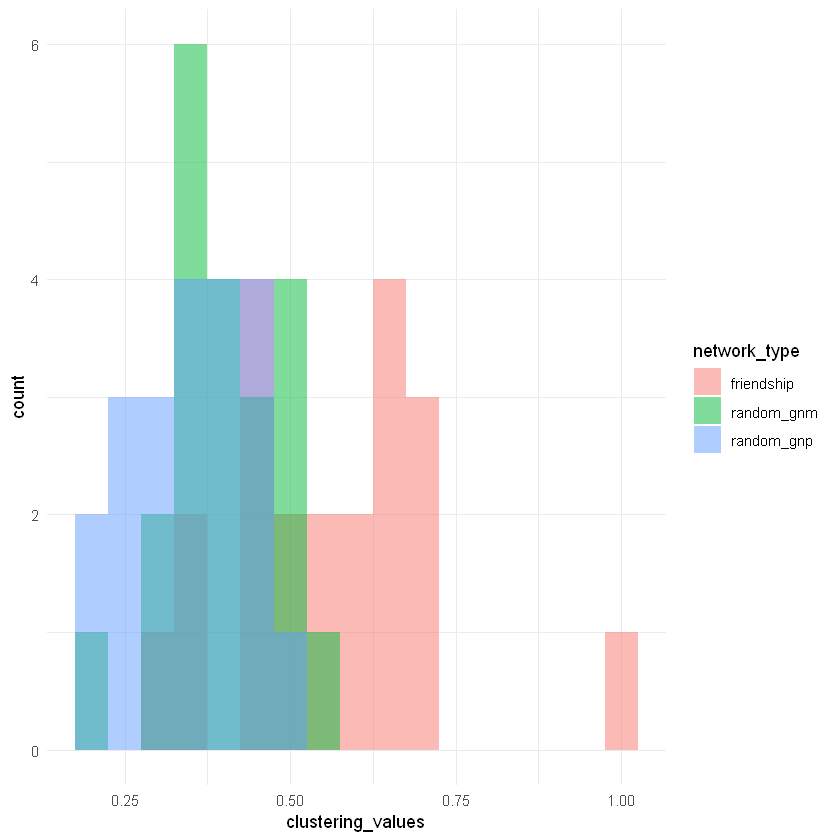

In [24]:
ggplot(network_data, 
       mapping = aes(x = clustering_values, fill = network_type)) +
  geom_histogram(binwidth = 0.05, 
                 position = position_identity(), 
                 alpha=0.5) +
  theme_minimal()

We observe that in the real friendship network there is a node with maximal clustering coefficient, and that in general, clustering coeffient in the real friendship networ is higher than in its random realisations. Let's see if that is visible in the summary statistics such as mean:

In [25]:
mean(transitivity(krack_friendship_undirect,type='local'))

[1] 0.566051

In [26]:
mean(transitivity(random_net_gnm,type='local'))

[1] 0.3902975

In [27]:
mean(transitivity(random_net_gnp,type='local'))

[1] 0.3441765

We see that mean local transitivity is higher in real than in the two random networks. Maybe, that is due to just this random realisation we've created and we analyse?

To check if that is the case, we can repeat the previous process multiple times and see if we can obtain clustering coefficient observed in the freidnship network.
1. we create a random network
2. calculate local transitivity for every node
3. calculate the mean value within the network
4. repeat 1-3

We will write this as a function to make it easily applicable for different network (and easily adaptable if you choose to investigate other properties besides clustering coefficient):

In [28]:
transitivity_random_graphs <- function(g, number_repetitions) {
    n = vcount(g)
    l = ecount(g)
    p = l/(0.5*n*(n-1)) 
    
    random_data = array(0,dim=number_repetitions) #empty array to store data from random realisation calculations
    
    for (i in 1:number_repetitions) {
        
        # choose one of random network realisation types:
        random_net = erdos.renyi.game(n, l,type='gnm')
        #random_net = erdos.renyi.game(n, p,type='gnp')
        
        # here we store mean transitivity data for every generated network, you can calculate any other random network value by changing this line (eg. sd of degrees, mean shortest path,...)
        random_data[i] = mean(transitivity(random_net,type='local'))
    }
    return(random_data)
}

Let's run this function and calculate local transitivity for 100 different random networks. We will store the functin return value in variable *random_clustering*:

In [29]:
set.seed(seed)
random_clustering = transitivity_random_graphs(krack_friendship_undirect,100)

Now, we compare the mean local transitivity found in the friendship network to different mean local transitivities found in the random networks:

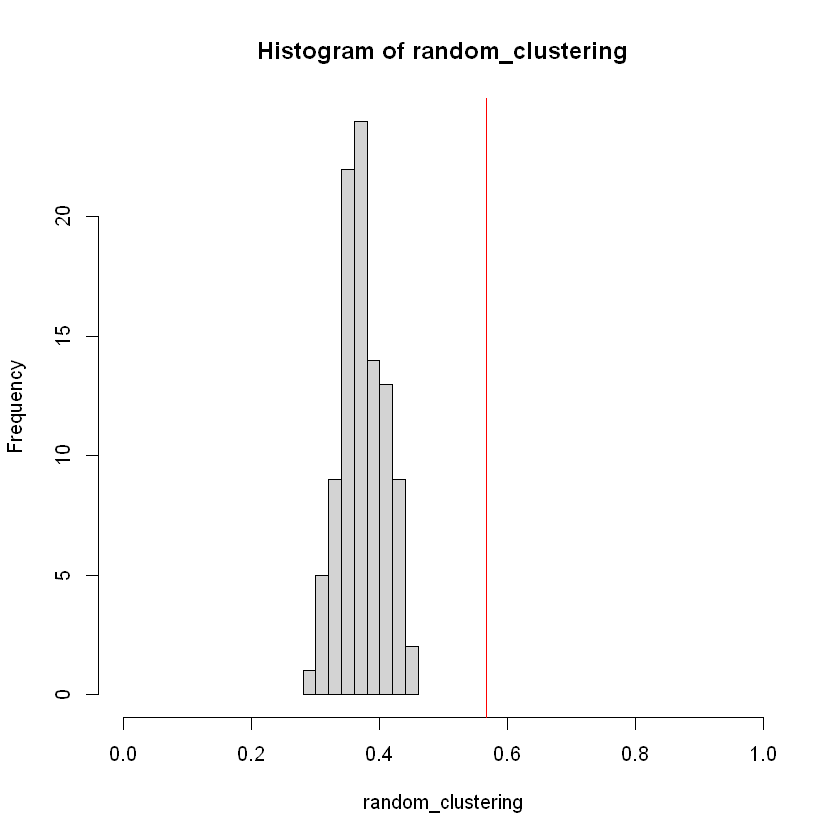

In [30]:
hist(random_clustering,xlim = (0:1))
abline(v= mean(transitivity(krack_friendship_undirect,type='local')), col="red")

We see that the mean local transitivity is higher in friendship network than in any of the 100 random realisations of networks with same number of links and nodes (it's similar when L is not fixed but when 'gnp' random nets are used - try!).

### Random graphs with preserved degree sequence

What if we don't preserve only the average degree in a network but the full sequence of node degrees?

This way we take into account node variability (e.g. not everyone is equally friendly) but we still aim to investigate if other network properities (such as other node's centrality measures or transitivity, or paths) are special in our observed network compared to random controls.

To create a random graph that preserves degree sequence, we use another built in functions ```sample_degseq```:

In [ ]:
?sample_degseq

In [31]:
set.seed(seed)
rewired_net = sample_degseq(degree(krack_friendship_undirect), method="vl")
summary(rewired_net)

IGRAPH 830580b U--- 21 79 -- Degree sequence random graph
+ attr: name (g/c), method (g/c)


As we fixed the degrees for each node, the total number of edges matches the original network. Let's see how this network looks like:

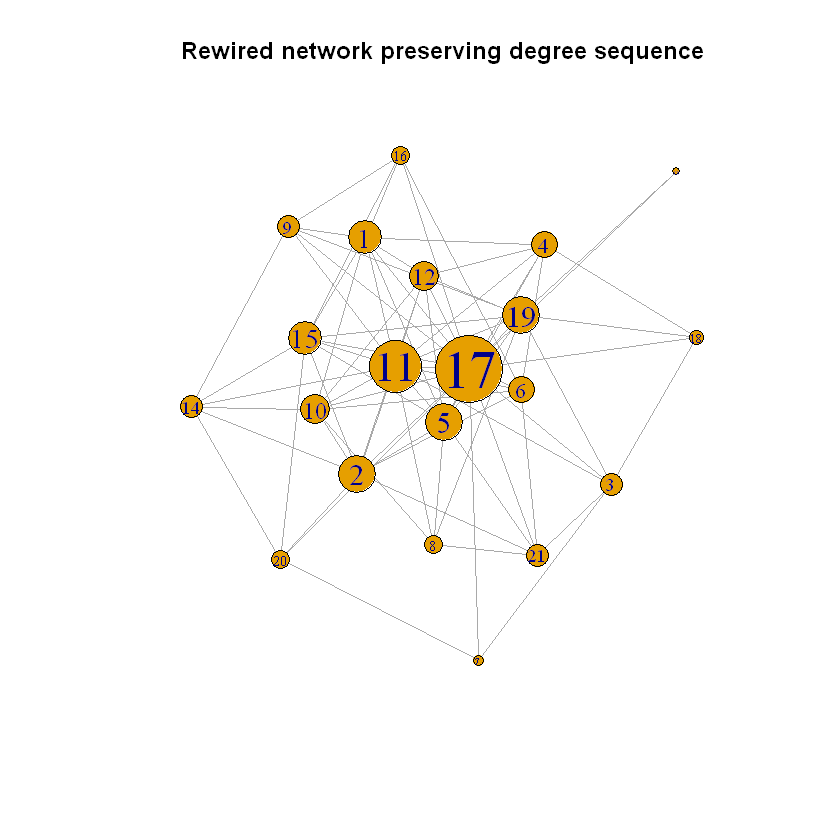

In [32]:
plot_graph(rewired_net,'Rewired network preserving degree sequence')

As we preserved degree sequence, all node sizes match the original network plot, but some edges are rewired (can you find some?).

For this network we can calcualte degree and local transitivity and compare them to previously discussed networks. We add this values in their own data frame:

In [33]:
rewired_data <- data.frame(
    network_type = c( rep("rewired_degseq_preserved", n)),
    degree_values = c(degree(rewired_net)),
    clustering_values = c(transitivity(rewired_net,type='local'))
)
head(rewired_data)

,network_type,degree_values,clustering_values
,<chr>,<dbl>,<dbl>
1,rewired_degseq_preserved,9,0.5833333
2,rewired_degseq_preserved,10,0.5333333
3,rewired_degseq_preserved,6,0.4666667
4,rewired_degseq_preserved,7,0.6190476
5,rewired_degseq_preserved,10,0.5777778
6,rewired_degseq_preserved,7,0.5238095


And add this dataframe as extra rows to the *network_data* that already contains data for previously discussed networks:

In [34]:
network_data <- rbind(network_data,rewired_data)
tail(network_data)

,network_type,degree_values,clustering_values
,<chr>,<dbl>,<dbl>
79,rewired_degseq_preserved,5,0.6000000
80,rewired_degseq_preserved,18,0.3267974
81,rewired_degseq_preserved,4,0.6666667
82,rewired_degseq_preserved,10,0.4000000
83,rewired_degseq_preserved,5,0.6000000
84,rewired_degseq_preserved,6,0.4666667


We can plot degree distributions:

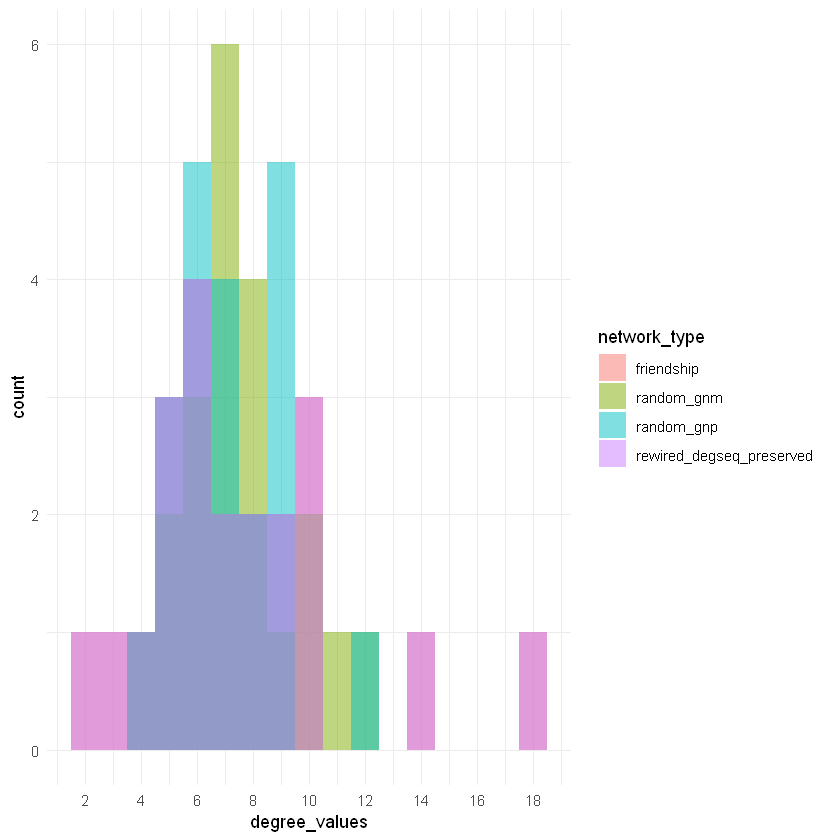

In [35]:
max_degree <- max(network_data$degree_values)
min_degree <- min(network_data$degree_values)

ggplot(network_data, 
       mapping = aes(x = degree_values, fill = network_type)) +
  geom_histogram(binwidth = 1, 
                 position = position_identity(), 
                 #position = position_dodge(),
                 alpha=0.5) +
  scale_x_continuous(breaks = seq(min_degree,max_degree,2)) +
  theme_minimal()

But as expected, that doesn't reveal anything special as degree sequence is preserved, so the plots of rewired network and original network fully overlap. Let's see if the situation is the same when we plot clustering coefficient:

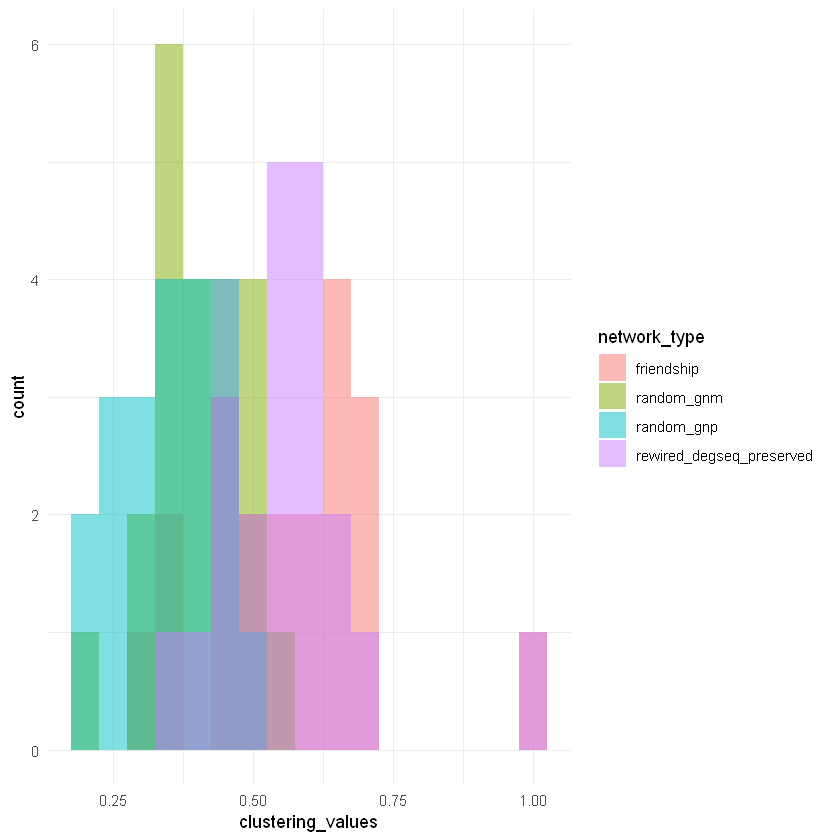

In [38]:
ggplot(network_data, 
       mapping = aes(x = clustering_values, fill = network_type)) +
  geom_histogram(binwidth = 0.05, 
                 position = position_identity(), 
                 #position = position_dodge(),
                 alpha=0.5) +
  theme_minimal()

Now, we see that local transitivities in the rewired network are more similar to those in the original friendship network, but there is still some variability. Let's repeat the process multiple times and see if transitivity can be explained by local variability in degrees:

In [40]:
set.seed(seed)
number_repetitions = 100
degseq = degree(krack_friendship_undirect)

random_clustering_rewired = array(0,dim=number_repetitions)
for (i in 1:number_repetitions) {
    rewired_net = sample_degseq(degseq, method="vl")
    random_clustering_rewired[i] = mean(transitivity(rewired_net,type='local'))
}

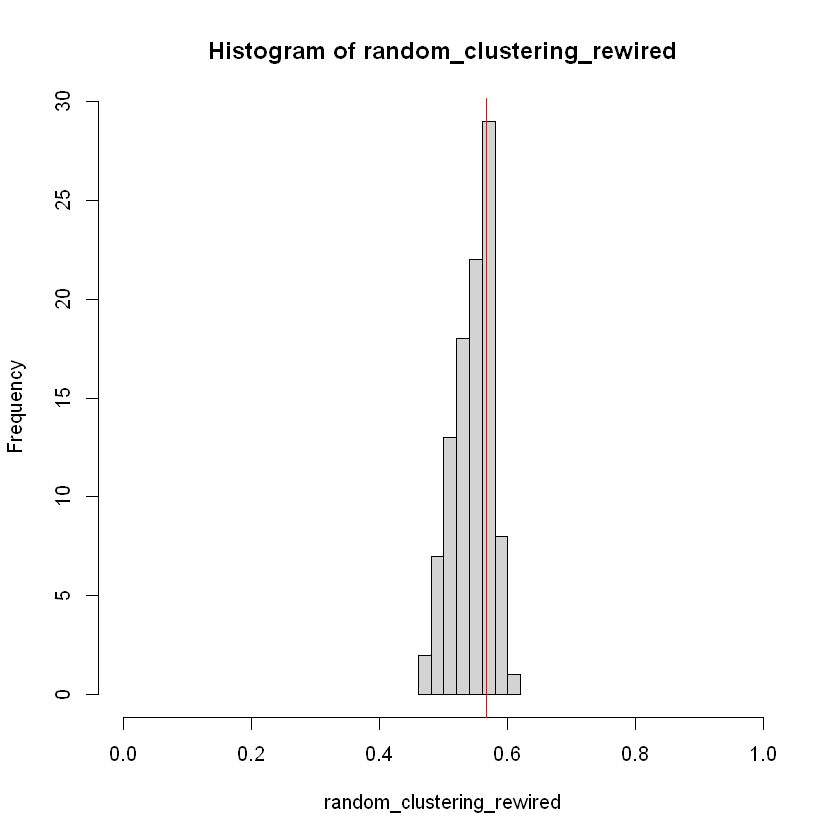

In [41]:
hist(random_clustering_rewired,xlim = (0:1))
abline(v= mean(transitivity(krack_friendship_undirect,type='local')), col="red")

In [42]:
sum(random_clustering_rewired < mean(transitivity(krack_friendship_undirect,type='local')))

[1] 74

We see that more than 70 networks have mean local transitivity than the friendship network. Still it seems that the friendship network's transitivity value is quite probable within the configurational model.

#### TASK
If interested in this topic, you might want to explore properties such as mean shortest path in friendship (or some other) network and compare with different random networks you can create.